# Python NLTK: Texts and Frequencies

**(C) 2017-2019 by [Damir Cavar](http://damir.cavar.me/) <<dcavar@iu.edu>>**

**Version:** 0.4, September 2019

**Download:** This and various other Jupyter notebooks are available from my [GitHub repo](https://github.com/dcavar/python-tutorial-for-ipython).

**License:** [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/) ([CA BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/))

This is a brief introduction to NLTK for simple frequency analysis of texts. I created this notebook for intro to corpus linguistics and natural language processing classes at Indiana University between 2017 and 2019.

For this to work, in the folder with the notebook we expect a subfolder data that contains a file HOPG.txt. This file contains the novel "A House of Pomegranates" by Oscar Wilde taken as raw text from [Project Gutenberg](https://www.gutenberg.org/).

## Simple File Processing

Reading a text into memory in Python is faily simple. We open a file, read from it, and close the file again. The following code prints out the first 300 characters of the text in memory:

In [39]:
ifile = open("Files/tuunique2.txt", mode='r', encoding='utf-8')
text = ifile.read()
ifile.close()
print(text[:300], "...")

﻿Má, te estoy contando una noticia muy importante y sólo me preguntas si pagué mi tarjeta. Qué _____ que eres.
Ma, por favor si yo confío en ti, te cuento mis cosas, es para que me aconseje, no para que estés todo impaciente...por todo.

Amigo? ...Mis papás y a ellos no les gusta el desorden. Entonc ...


The optional parameters in the *open* function above define the **mode** of operations on the file and the **encoding** of the content. For example, setting the **mode** to **r** declares that *reading* from the file is the only permitted operation that we will perform in the following code. Setting the **encoding** to **utf-8** declares that all characters will be encoded using the [Unicode](https://en.wikipedia.org/wiki/Unicode) encoding schema [UTF-8](https://en.wikipedia.org/wiki/UTF-8) for the content of the file.

We can now import the [NLTK](https://www.nltk.org/) module in Python to work with frequency profiles and [n-grams](https://en.wikipedia.org/wiki/N-gram) using the tokens or words in the text.

In [40]:
import nltk

We can now lower the text, which means normalizing it to all characters lower case:

In [41]:
text = text.lower()
print(text[:300], "...")

﻿má, te estoy contando una noticia muy importante y sólo me preguntas si pagué mi tarjeta. qué _____ que eres.
ma, por favor si yo confío en ti, te cuento mis cosas, es para que me aconseje, no para que estés todo impaciente...por todo.

amigo? ...mis papás y a ellos no les gusta el desorden. entonc ...


To generate a frequency profile from the text file, we can use the [NLTK](https://www.nltk.org/) function *FreqDist*:

In [42]:
myFD = nltk.FreqDist(text)

In [43]:
from math import log

## From Characters to Words/Tokens

We see that the frequency profile is for the characters in the text, not the words or tokens. In order to generate a frequency profile over words/tokens in the text, we need to utilize a **tokenizer**. [NLTK](https://www.nltk.org/) provides basic tokenization functions. We will use the *word_tokenize* function to generate a list of tokens:

In [44]:
tokens = nltk.word_tokenize(text)
tokens = [w.lower() for w in tokens]

In [45]:
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]


In [46]:
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

In [47]:
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['contando', 'noticia', 'importante', 'sólo', 'preguntas', 'si', 'pagué', 'tarjeta', 'ma', 'favor', 'si', 'confío', 'cuento', 'cosas', 'aconseje', 'impaciente', 'amigo', 'papás', 'gusta', 'desorden', 'entonces', 'necesito', 'ayudes', 'favor', 'organizar', 'cosas', 'rápido', 'consciente', 'salud', 'gustaría', 'verte', 'mejor', 'poder', 'seguir', 'charlando', 'seguir', 'jugando', 'naipes', 'charlamos', 'pues', 'entonces', 'mejores', 'salud', 'gustaría', 'tomes', 'pastillas', 'fingas', 'botes', 'verdad', 'importante', 'bien', 'gustar', 'contigo', 'ma', 'hola', 'acuerdas', 'galletas', 'preparamos', 'vacaciones', 'pasadas', 'quiero', 'volverlas', 'preparar', 'novio', 'gustaron', 'recuerdo', 'cómo', 'hacerlas', 'puedes', 'ayudarme', 'hola', 'quería', 'preguntar', 'día', 'queda', 'fácil', 'reunirnos', 'empezar', 'investigaciones', 'química', 'dejemos', 'correr', 'tiempo', 'podamos', 'avisas', 'horas', 'visto', 'gustan', 'perros', 'perros', 'primero', 'preguntas', 'ten', 'cuidado', 'madre', 'f

We can print out the first 20 tokens to verify our data structure is a list with lower-case strings:

In [48]:
words[:20]

['contando',
 'noticia',
 'importante',
 'sólo',
 'preguntas',
 'si',
 'pagué',
 'tarjeta',
 'ma',
 'favor',
 'si',
 'confío',
 'cuento',
 'cosas',
 'aconseje',
 'impaciente',
 'amigo',
 'papás',
 'gusta',
 'desorden']

We can now generate a frequency profile from the token list, as we did with the characters above:

In [49]:
myTokenFD = nltk.FreqDist(words)

The frequency profile can be printed out in the same way as above by looping over the tokens and their frequencies. Note that we restrict the loop to the first 20 tokens here just to keep the notebook smaller. You can remove the [:20] selector in your own experiments.

In [50]:
for token in list(myTokenFD.items()):
    print(token[0], token[1])

contando 1
noticia 1
importante 4
sólo 2
preguntas 3
si 58
pagué 1
tarjeta 1
ma 3
favor 96
confío 1
cuento 1
cosas 22
aconseje 1
impaciente 1
amigo 9
papás 8
gusta 21
desorden 2
entonces 21
necesito 8
ayudes 1
organizar 4
rápido 1
consciente 1
salud 12
gustaría 14
verte 1
mejor 12
poder 6
seguir 4
charlando 1
jugando 3
naipes 1
charlamos 1
pues 28
mejores 1
tomes 3
pastillas 14
fingas 1
botes 2
verdad 10
bien 31
gustar 1
contigo 14
hola 15
acuerdas 6
galletas 21
preparamos 1
vacaciones 1
pasadas 1
quiero 23
volverlas 2
preparar 7
novio 7
gustaron 2
recuerdo 3
cómo 25
hacerlas 1
puedes 33
ayudarme 2
quería 3
preguntar 1
día 7
queda 6
fácil 3
reunirnos 2
empezar 1
investigaciones 1
química 1
dejemos 1
correr 1
tiempo 12
podamos 2
avisas 2
horas 2
visto 2
gustan 5
perros 10
primero 7
ten 5
cuidado 8
madre 9
préstame 1
atención 4
ayúdame 9
limpiar 3
viene 1
gente 3
casa 13
tómate 5
enseñes 1
hacer 34
especiales 1
tener 8
presente 1
amigos 5
quieres 19
empecemos 1
trabajos 1
adelantar 1
nom

In [51]:
print(myTokenFD)

<FreqDist with 990 samples and 2681 outcomes>


In [52]:
myTokenFD.most_common(20)


[('favor', 96),
 ('si', 58),
 ('hacer', 34),
 ('puedes', 33),
 ('bien', 31),
 ('pues', 28),
 ('cómo', 25),
 ('quiero', 23),
 ('mira', 23),
 ('cosas', 22),
 ('gusta', 21),
 ('entonces', 21),
 ('galletas', 21),
 ('perro', 20),
 ('quieres', 19),
 ('tan', 19),
 ('papá', 18),
 ('música', 18),
 ('oye', 17),
 ('dime', 16)]

['favor', 'si', 'hacer', 'puedes', 'bien', 'pues', 'cómo', 'quiero', 'mira', 'cosas', 'gusta', 'entonces', 'galletas', 'perro', 'quieres', 'tan', 'papá', 'música', 'oye', 'dime']


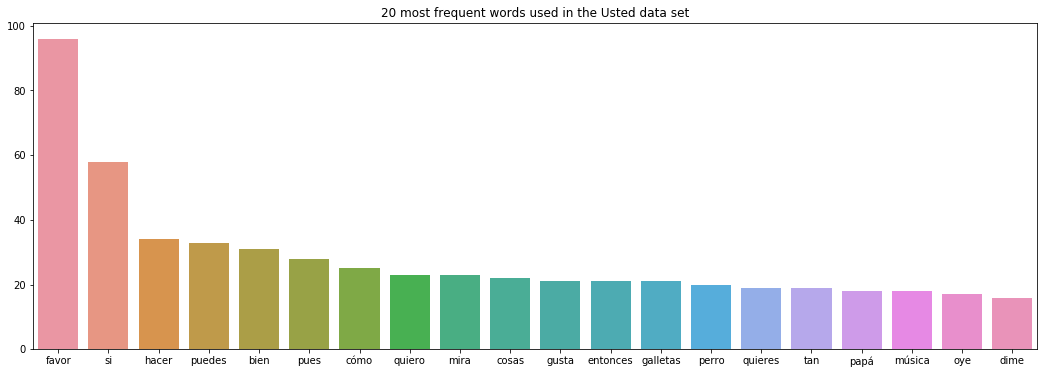

In [53]:
#for token in list(myTokenFD.items()):
 #   print(token[0], token[1])
import seaborn as sns
import matplotlib.pyplot as plt

common_words = [word[0] for word in myTokenFD.most_common(20)]
print(common_words)
common_counts = [word[1] for word in myTokenFD.most_common(20)]

fig = plt.figure(figsize=(18,6))
sns.barplot(x= common_words, y= common_counts)
plt.title('20 most frequent words used in the Usted data set')
plt.show()

In [16]:
sum(myTokenFD.values())

2681

In [17]:
float(sum(myTokenFD.values()))

2681.0

In [18]:
total = float(sum(myTokenFD.values()))
print(total)

2681.0


for x in ":=,.-[];!'\"\”\“\t\n/ ?=¿)(":
    del myTokenFD[x]

In [1]:
#for x in myTokenFD:
 #   tokens2 = print(x, myTokenFD[x])

In [97]:
# relative frequency
relfrqtokens = [x/total for x in myTokenFD.values() ]
print(relfrqtokens)


[0.03622327790973872, 0.005344418052256532, 0.0005938242280285036, 0.0005938242280285036, 0.0005938242280285036, 0.0005938242280285036, 0.0005938242280285036, 0.0029691211401425177, 0.0011876484560570072, 0.0005938242280285036, 0.0005938242280285036, 0.0059382422802850355, 0.0005938242280285036, 0.0011876484560570072, 0.0011876484560570072, 0.0011876484560570072, 0.014845605700712588, 0.020190023752969122, 0.010688836104513063, 0.010095011876484561, 0.0035629453681710215, 0.007125890736342043, 0.0035629453681710215, 0.0005938242280285036, 0.005344418052256532, 0.011282660332541567, 0.0017814726840855108, 0.0011876484560570072, 0.004156769596199525, 0.0011876484560570072, 0.0011876484560570072, 0.0023752969121140144, 0.0005938242280285036, 0.0005938242280285036, 0.0029691211401425177, 0.0029691211401425177, 0.0017814726840855108, 0.0011876484560570072, 0.0029691211401425177, 0.0005938242280285036, 0.014845605700712588, 0.0011876484560570072, 0.0035629453681710215, 0.0035629453681710215,

In [98]:
from math import log

In [99]:
def entropy(p):
    return -sum( [ x * log(x, 2) for x in p ] )

In [100]:
print(entropy(relfrqtokens))

8.45175992209559


In [101]:
entdist2 = [ -x * log(x, 2) for x in relfrqtokens ]
print(entdist2)

[0.17339862483118415, 0.04033833895167265, 0.006364415928186697, 0.006364415928186697, 0.006364415928186697, 0.006364415928186697, 0.006364415928186697, 0.024927993848512568, 0.011541183400316386, 0.006364415928186697, 0.006364415928186697, 0.0439177454167401, 0.006364415928186697, 0.011541183400316386, 0.011541183400316386, 0.011541183400316386, 0.09016954028045829, 0.11367414595115553, 0.06998784179883225, 0.06693208485206234, 0.028976415400279957, 0.05082694006421787, 0.028976415400279957, 0.006364415928186697, 0.04033833895167265, 0.07299597938410535, 0.016269680384225486, 0.011541183400316386, 0.03288138391155673, 0.011541183400316386, 0.011541183400316386, 0.020707069888518753, 0.006364415928186697, 0.006364415928186697, 0.024927993848512568, 0.024927993848512568, 0.016269680384225486, 0.011541183400316386, 0.024927993848512568, 0.006364415928186697, 0.09016954028045829, 0.011541183400316386, 0.028976415400279957, 0.028976415400279957, 0.006364415928186697, 0.016269680384225486, 

## Counting N-grams

[NLTK](https://www.nltk.org/) provides simple methods to generate [n-gram](https://en.wikipedia.org/wiki/N-gram) models or frequency profiles over [n-grams](https://en.wikipedia.org/wiki/N-gram) from any kind of list or sequence. We can for example generate a bi-gram model, that is an [n-grams](https://en.wikipedia.org/wiki/N-gram) model for n = 2, from the text tokens:

In [21]:
myTokenBigrams = nltk.ngrams(words, 2)

To store the bigrams in a list that we want to process and analyze further, we convert the **Python generator object** myTokenBigrams to a list:

In [22]:
bigrams = list(myTokenBigrams)

Let us verify that the resulting data structure is indeed a list of string tuples. We will print out the first 20 tuples from the bigram list:

In [23]:
print(bigrams[:20])

[('ma', 'usted'), ('usted', 'regañona'), ('regañona', 'toda'), ('toda', 'hora'), ('hora', 'diciéndole'), ('diciéndole', 'hacer'), ('hacer', 'déjeme'), ('déjeme', 'aprendiendo'), ('aprendiendo', 'amor'), ('amor', 'venga'), ('venga', 'ayúdeme'), ('ayúdeme', 'necesito'), ('necesito', 'recoger'), ('recoger', 'rápido'), ('rápido', 'lleguen'), ('lleguen', 'papás'), ('papás', 'recoja'), ('recoja', 'botellas'), ('botellas', 'ayúdeme'), ('ayúdeme', 'limpiar')]


We can now verify the number of bigrams and check that there are exactly *number of tokens - 1 = number of bigrams* in the resulting list:

In [24]:
print(len(bigrams))
print(len(tokens))

2457
5995


The frequency profile from these bigrams is generated in exactly the same way as from the token list in the examples above:

In [25]:
myBigramFD = nltk.FreqDist(bigrams)

If we would want to know some more general properties of the frequency distribution, we can print out information about it. The print statement for this bigram frequency distribution tells us that we have 17,766 types and 38,126 tokens:

In [26]:
print(myBigramFD)

<FreqDist with 2221 samples and 2457 outcomes>


The bigrams and their corresponding frequencies can be printed using a *for* loop. We restrict the number of printed items to 20, just to keep this list reasonably long. If you would like to see the full frequency profile, remove the [:20] restrictor.

In [27]:
for bigram in list(myBigramFD.items())[:20]:
    print(bigram[0], bigram[1])
print("...")

('ma', 'usted') 1
('usted', 'regañona') 1
('regañona', 'toda') 1
('toda', 'hora') 1
('hora', 'diciéndole') 1
('diciéndole', 'hacer') 1
('hacer', 'déjeme') 1
('déjeme', 'aprendiendo') 1
('aprendiendo', 'amor') 1
('amor', 'venga') 1
('venga', 'ayúdeme') 1
('ayúdeme', 'necesito') 2
('necesito', 'recoger') 1
('recoger', 'rápido') 1
('rápido', 'lleguen') 1
('lleguen', 'papás') 1
('papás', 'recoja') 1
('recoja', 'botellas') 1
('botellas', 'ayúdeme') 1
('ayúdeme', 'limpiar') 1
...


Pretty printing the bigrams is possible as well:

In [28]:
for ngram in list(myBigramFD.items()):
    print(" ".join(ngram[0]), ngram[1])
print("...")

ma usted 1
usted regañona 1
regañona toda 1
toda hora 1
hora diciéndole 1
diciéndole hacer 1
hacer déjeme 1
déjeme aprendiendo 1
aprendiendo amor 1
amor venga 1
venga ayúdeme 1
ayúdeme necesito 2
necesito recoger 1
recoger rápido 1
rápido lleguen 1
lleguen papás 1
papás recoja 1
recoja botellas 1
botellas ayúdeme 1
ayúdeme limpiar 1
limpiar bueno 1
bueno señora 1
señora vamos 1
vamos tomarnos 1
tomarnos pastilla 1
pastilla hoy 1
hoy va 1
va aliviar 1
aliviar haga 1
haga trampa 1
trampa chica 1
chica nueva 1
nueva páseme 1
páseme pelota 2
pelota devuevlo 1
devuevlo bueno 1
bueno mamá 1
mamá ayúdeme 1
ayúdeme preparar 1
preparar galletas 1
galletas deliciosas 1
deliciosas navidad 1
navidad ma 1
ma favor 1
favor si 1
si confío 1
confío cuento 1
cuento cosas 2
cosas aconseje 2
aconseje impaciente 1
impaciente hola 1
hola verdad 1
verdad nerviosa 1
nerviosa aprender 1
aprender trabajo 1
trabajo ansisoa 1
ansisoa pena 1
pena olvidado 1
olvidado nombre 1
nombre puede 1
puede repetir 1
repetir

acensor subir 1
subir tercer 1
favor señor 3
señor agente 4
agente tan 1
amable guiarme 1
guiarme hotel 1
hotel entretuve 1
entretuve acuerdo 1
acuerdo verdad 1
verdad bogotá 1
bogotá grande 1
grande perdí 1
perdí perdido 1
perdido favor 1
favor tan 1
amable encaminarme 1
encaminarme dónde 1
dónde puedo 1
hotel aquí 1
aquí boda 1
boda perro 1
perro dos 1
dos muévase 1
muévase usted 1
pues iba 1
iba pagar 1
pagar cuándo 1
cuándo va 2
va pagar 2
pagar pues 1
pues parece 1
mal hecho 2
hecho citado 1
citado presente 1
presente mal 1
hecho usted 1
usted traido 1
traido gusta 1
gusta usted 1
usted paciente 1
paciente atender 1
atender clientes 1
clientes usted 1
usted ve 1
ve tan 1
tan mal 1
mal educada 1
educada oiga 1
oiga pa 1
pa moverlas 1
moverlas mejor 1
mejor organizaditas 1
organizaditas fácil 1
fácil organizar 1
organizar trasteo 1
trasteo mami 1
mami vida 1
vida independiente 1
independiente usted 1
usted entonces 1
entonces bueno 1
bueno respetes 1
respetes ideas 1
ideas ponéte 1


In [29]:
for ngram in list(myBigramFD.most_common(10)):
    print(" ".join(ngram[0]), ngram[1])
print("...")

tan amable 7
llegar hotel 7
usted dijo 6
tercer piso 6
puede ayudar 5
si usted 5
usted puede 5
hágame favor 5
si quiere 4
favor señora 4
...


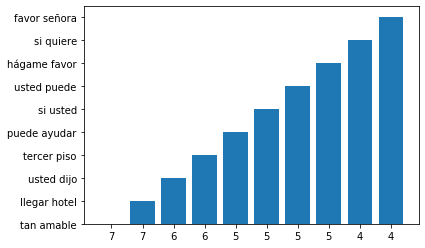

In [35]:
import numpy as np

heighttu = ["puedes ayudar", "pena contigo", "gustaría hacer", "vienen papás", "llegar hotel", "quieres hacer", "tómate pastillas", "bien favor", "pásame pelota", "ver si"]
barstu = (10, 7, 7, 6, 5, 5, 4, 4, 4, 4)

heightvos = ["ver si", "si podés", "podés ayudar", "vos gustaría", "árbol genealógico", "novio novia", "vos sos", "ayudame limpiar", "hacer árbol", "gustaría hacer"]
barsvos = (12, 8, 8, 8, 7, 6, 5, 5, 5, 5)

heightusted = ["tan amable", "llegar hotel", "usted dijo", "tercer piso", "puede ayudar", "si usted", "usted puede", "hágame favor", "si quiere", "favor señora"]
barsusted = (7, 7, 6, 6, 5, 5, 5, 5, 4, 4)

y_pos = np.arange(len(barsusted))
 
# Create bars
plt.bar(y_pos, heightusted)
 
# Create names on the x-axis
plt.xticks(y_pos, barsusted)
 
# Show graphic
plt.show()


(C) 2017-2019 by [Damir Cavar](http://damir.cavar.me/) <<dcavar@iu.edu>>

[('tan', 'amable'), ('llegar', 'hotel'), ('usted', 'dijo'), ('tercer', 'piso'), ('puede', 'ayudar'), ('si', 'usted'), ('usted', 'puede'), ('hágame', 'favor'), ('si', 'quiere'), ('favor', 'señora')]
[7, 7, 6, 6, 5, 5, 5, 5, 4, 4]


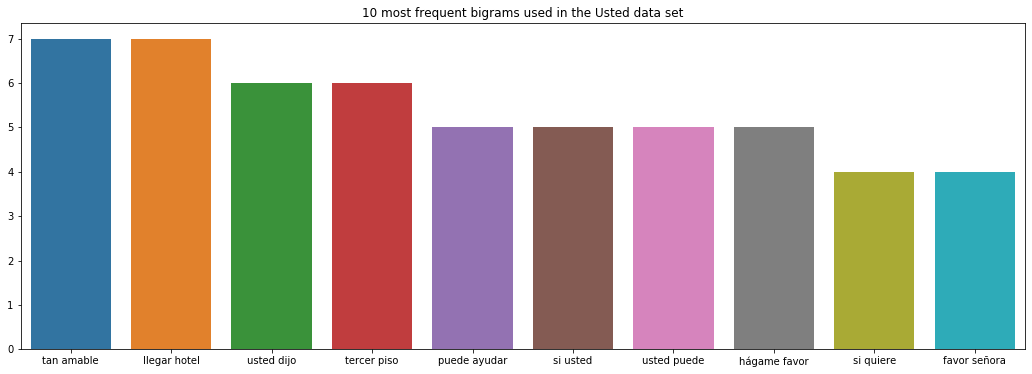

In [37]:
common_bigrams = [ngram[0] for ngram in myBigramFD.most_common(10)]
print(common_bigrams)

bigrams_count = [ngram[1] for ngram in myBigramFD.most_common(10)]
print(bigrams_count)

fig = plt.figure(figsize=(18,6))
sns.barplot(x= heightusted, y= barsusted)
plt.title('10 most frequent bigrams used in the Usted data set')
plt.show()

In [44]:
common_bigrams = [ngram[0] for ngram in list(myBigramFD.most_common(10))]
print(common_bigrams)

bigrams_count = [ngram[1] for ngram in list(myBigramFD.most_common(10))]
print(bigrams_count)

[('puedes', 'ayudar'), ('pena', 'contigo'), ('gustaría', 'hacer'), ('vienen', 'papás'), ('llegar', 'hotel'), ('quieres', 'hacer'), ('tómate', 'pastillas'), ('bien', 'favor'), ('pásame', 'pelota'), ('ver', 'si')]
[10, 7, 7, 6, 5, 5, 4, 4, 4, 4]


## Trigram

In [149]:
myTokenTrigrams = nltk.ngrams(words, 3)

In [150]:
trigrams = list(myTokenTrigrams)

In [151]:
print(trigrams[:20])

[('ma', 'usted', 'regañona'), ('usted', 'regañona', 'toda'), ('regañona', 'toda', 'hora'), ('toda', 'hora', 'diciéndole'), ('hora', 'diciéndole', 'hacer'), ('diciéndole', 'hacer', 'déjeme'), ('hacer', 'déjeme', 'aprendiendo'), ('déjeme', 'aprendiendo', 'amor'), ('aprendiendo', 'amor', 'venga'), ('amor', 'venga', 'ayúdeme'), ('venga', 'ayúdeme', 'necesito'), ('ayúdeme', 'necesito', 'recoger'), ('necesito', 'recoger', 'rápido'), ('recoger', 'rápido', 'lleguen'), ('rápido', 'lleguen', 'papás'), ('lleguen', 'papás', 'recoja'), ('papás', 'recoja', 'botellas'), ('recoja', 'botellas', 'ayúdeme'), ('botellas', 'ayúdeme', 'limpiar'), ('ayúdeme', 'limpiar', 'bueno')]


In [152]:
print(len(trigrams))
print(len(tokens))

2457
6040


In [153]:
myTrigramFD = nltk.FreqDist(trigrams)

In [154]:
print(myTrigramFD)

<FreqDist with 2429 samples and 2457 outcomes>


In [155]:
for trigram in list(myTrigramFD.items())[:20]:
    print(trigram[0], trigram[1])
print("...")

('ma', 'usted', 'regañona') 1
('usted', 'regañona', 'toda') 1
('regañona', 'toda', 'hora') 1
('toda', 'hora', 'diciéndole') 1
('hora', 'diciéndole', 'hacer') 1
('diciéndole', 'hacer', 'déjeme') 1
('hacer', 'déjeme', 'aprendiendo') 1
('déjeme', 'aprendiendo', 'amor') 1
('aprendiendo', 'amor', 'venga') 1
('amor', 'venga', 'ayúdeme') 1
('venga', 'ayúdeme', 'necesito') 1
('ayúdeme', 'necesito', 'recoger') 1
('necesito', 'recoger', 'rápido') 1
('recoger', 'rápido', 'lleguen') 1
('rápido', 'lleguen', 'papás') 1
('lleguen', 'papás', 'recoja') 1
('papás', 'recoja', 'botellas') 1
('recoja', 'botellas', 'ayúdeme') 1
('botellas', 'ayúdeme', 'limpiar') 1
('ayúdeme', 'limpiar', 'bueno') 1
...


In [156]:
for ngram in list(myTrigramFD.items()):
    print(" ".join(ngram[0]), ngram[1])
print("...")

ma usted regañona 1
usted regañona toda 1
regañona toda hora 1
toda hora diciéndole 1
hora diciéndole hacer 1
diciéndole hacer déjeme 1
hacer déjeme aprendiendo 1
déjeme aprendiendo amor 1
aprendiendo amor venga 1
amor venga ayúdeme 1
venga ayúdeme necesito 1
ayúdeme necesito recoger 1
necesito recoger rápido 1
recoger rápido lleguen 1
rápido lleguen papás 1
lleguen papás recoja 1
papás recoja botellas 1
recoja botellas ayúdeme 1
botellas ayúdeme limpiar 1
ayúdeme limpiar bueno 1
limpiar bueno señora 1
bueno señora vamos 1
señora vamos tomarnos 1
vamos tomarnos pastilla 1
tomarnos pastilla hoy 1
pastilla hoy va 1
hoy va aliviar 1
va aliviar haga 1
aliviar haga trampa 1
haga trampa chica 1
trampa chica nueva 1
chica nueva páseme 1
nueva páseme pelota 1
páseme pelota devuevlo 1
pelota devuevlo bueno 1
devuevlo bueno mamá 1
bueno mamá ayúdeme 1
mamá ayúdeme preparar 1
ayúdeme preparar galletas 1
preparar galletas deliciosas 1
galletas deliciosas navidad 1
deliciosas navidad ma 1
navidad m

pido favor diga 1
favor diga días 1
diga días podemos 1
días podemos reunir 1
podemos reunir empecemos 1
reunir empecemos trabajar 1
empecemos trabajar señor 1
trabajar señor pregunto 1
señor pregunto queda 1
pregunto queda dirección 1
queda dirección puede 1
dirección puede decir 1
puede decir señora 1
decir señora hace 1
señora hace favor 1
hace favor recuerda 1
favor recuerda nombre 2
recuerda nombre acuerdo 1
nombre acuerdo cómo 1
acuerdo cómo llama 1
cómo llama señora 1
llama señora oigame 1
señora oigame perro 1
oigame perro cuántos 1
perro cuántos perros 1
cuántos perros ah 1
perros ah papá 1
ah papá dicho 1
papá dicho mueva 2
dicho mueva cosas 2
mueva cosas sitio 1
cosas sitio dónde 1
sitio dónde pongo 1
dónde pongo hermano 1
pongo hermano hágale 1
hermano hágale pagueme 1
hágale pagueme plata 1
pagueme plata así 1
plata así entonces 1
así entonces yendose 1
entonces yendose partas 1
yendose partas pues 1
partas pues gastándose 1
pues gastándose plata 1
gastándose plata pagueme